<a href="https://colab.research.google.com/github/Ianfm94/Dissertation/blob/master/Notebooks/4.%20SMOTE_Workings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloading Required packages for SMOTE & Performance Metrics

#%pip install imbalanced-learn

# Importing required packages
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import pandas as pd
import numpy as np
from numpy import array
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Softmax
from keras.layers import RepeatVector, BatchNormalization, TimeDistributed
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import LearningRateScheduler
from keras.metrics import Precision, Recall, AUC, Accuracy
import keras_metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import imblearn
from keras import backend as K

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

from google.colab import  drive
drive.mount('/drive', force_remount=True)

print(tf.__version__)
print(imblearn.__version__)

Mounted at /drive
2.3.0
0.4.3


In [ ]:
# Reading in training and labels data
train = pd.read_csv('Training_Data_Distribution.csv',
  index_col = 0)
train = pd.DataFrame(train)

train.drop(train.columns[-2], axis=1, inplace=True)

print(train['Label'].value_counts())

y = train.Label

train.drop(train.columns[-2], axis=1, inplace=True)
train = pd.DataFrame(train)

print()
print(train.info())
print(train.head(n=10))
print(train.shape)

0    388558
1      1442
Name: Label, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390000 entries, 0 to 389999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Return    390000 non-null  float64
 1   Sequence  390000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 8.9 MB
None
     Return  Sequence
0  0.712069         0
1 -0.101955         1
2 -0.013312         2
3  0.042160         3
4  0.153044         4
5  0.035434         5
6 -0.105158         6
7  0.313591         7
8 -0.083952         8
9 -0.080706         9
(390000, 2)


In [ ]:
np.random.seed(111)

x_train, x_valid, y_train, y_valid, = train_test_split(train, y,
    test_size=0.25, random_state=111)

print("Number transactions x_train dataset: ", x_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions x_test dataset: ", x_valid.shape) 
print("Number transactions y_test dataset: ", y_valid.shape) 
print()
print("Before SMOTE, counts of Price Jumps in Training Data: {}".format(sum(y_train == 1))) 
print("Before SMOTE, counts of Volatility in Training Data: {} \n".format(sum(y_train == 0))) 
print("Before SMOTE, total count in Training Data: {} \n".format(sum(y_train == 0) + sum(y_train == 1)))  

print("Before SMOTE, counts of Price Jumps in Validation Data: {}".format(sum(y_valid == 1))) 
print("Before SMOTE, counts of Volatility in Validation Data: {} \n".format(sum(y_valid == 0))) 
print("Before SMOTE, total count in Validation Data: {} \n".format(sum(y_valid == 0) + sum(y_valid == 1)))  


Number transactions x_train dataset:  (292500, 2)
Number transactions y_train dataset:  (292500,)
Number transactions x_test dataset:  (97500, 2)
Number transactions y_test dataset:  (97500,)

Before SMOTE, counts of Price Jumps in Training Data: 1083
Before SMOTE, counts of Volatility in Training Data: 291417 

Before SMOTE, total count in Training Data: 292500 

Before SMOTE, counts of Price Jumps in Validation Data: 359
Before SMOTE, counts of Volatility in Validation Data: 97141 

Before SMOTE, total count in Validation Data: 97500 



In [ ]:
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
x_train, y_train = pipeline.fit_resample(x_train, y_train)
x_valid, y_valid = pipeline.fit_resample(x_valid, y_valid)
print()

print('After SMOTE, the shape of x_train_1: {}'.format(x_train.shape)) 
print('After SMOTE, the shape of y_train_1: {} \n'.format(y_train.shape))
print('After SMOTE, the shape of x_valid_1: {}'.format(x_valid.shape)) 
print('After SMOTE, the shape of y_valid_1: {} \n'.format(y_valid.shape))
 
print("After SMOTE, counts of Price Jumps in Training Data: {}".format(sum(y_train == 1))) 
print("After SMOTE, counts of Volatility in Training Data: {}".format(sum(y_train == 0))) 
print("After SMOTE, total count in Training Data: {} \n".format(sum(y_train == 0) + sum(y_train == 1)))

print("After SMOTE, counts of Price Jumps in Validation Data: {}".format(sum(y_valid == 1))) 
print("After SMOTE, counts of Volatility in Validation Data: {}".format(sum(y_valid == 0))) 
print("After SMOTE, total count in Validation Data: {} \n".format(sum(y_valid == 0) + sum(y_valid == 1)))

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_valid = pd.DataFrame(x_valid)
y_valid = pd.DataFrame(y_valid)

x_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')
x_valid.to_csv('x_valid.csv')
y_valid.to_csv('y_valid.csv')


After SMOTE, the shape of x_train_1: (87423, 2)
After SMOTE, the shape of y_train_1: (87423,) 

After SMOTE, the shape of x_valid_1: (29142, 2)
After SMOTE, the shape of y_valid_1: (29142,) 

After SMOTE, counts of Price Jumps in Training Data: 29141
After SMOTE, counts of Volatility in Training Data: 58282
After SMOTE, total count in Training Data: 87423 

After SMOTE, counts of Price Jumps in Validation Data: 9714
After SMOTE, counts of Volatility in Validation Data: 19428
After SMOTE, total count in Validation Data: 29142 



In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

n_samples_train = x_train.shape[0]
n_samples_valid = x_valid.shape[0]
n_timesteps = 2
n_timesteps_x = x_train.shape[1]
n_timesteps_y = y_train.shape[1]
n_features = 1

x_train = np.reshape(x_train, (n_samples_train, n_timesteps_x, n_features))
x_valid = np.reshape(x_valid, (n_samples_valid, n_timesteps_x, n_features))
y_train = np.reshape(y_train, (n_samples_train, n_timesteps_y, n_features))
y_valid = np.reshape(y_valid, (n_samples_valid, n_timesteps_y, n_features))

x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
# LSTM Workings_Autoencoder Model

ac_model_1 = Sequential()
ac_model_1.add(Bidirectional(LSTM(units=200, return_sequences = True,
                               input_shape = (n_timesteps, n_features), 
                                kernel_initializer='glorot_normal')))
ac_model_1.add(LSTM(100))
ac_model_1.add(Dropout(0.2))

ac_model_1.add(RepeatVector(n_timesteps))

ac_model_1.add(LSTM(100, return_sequences = True))
ac_model_1.add(Dropout(0.2))
ac_model_1.add(LSTM(200, return_sequences = True))
ac_model_1.add(TimeDistributed(Dense(2, activation='sigmoid')))

ac_model_1.compile(loss='binary_crossentropy', optimizer='SGD', 
                 metrics=['accuracy'])

results_ac_model_1 = ac_model_1.fit(x_train, y_train, epochs=100, batch_size=32,
                        shuffle=True, validation_data=(x_valid, y_valid))

print(ac_model_1.summary())

Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
# Performance Metrcs

Train_Acc = np.mean(results_ac_model_1.history["accuracy"]) * 100
Train_Acc = round(Train_Acc, 2)
Valid_Acc = np.mean(results_ac_model_1.history["val_accuracy"]) * 100
Valid_Acc = round(Valid_Acc, 2)
Train_Precision = np.mean(results_ac_model_1.history["precision_m"]) * 100
Train_Precision = round(Train_Precision, 2)
Valid_Precision = np.mean(results_ac_model_1.history["val_precision_m"]) * 100
Valid_Precision = round(Valid_Precision, 2)
Train_Recall = np.mean(results_ac_model_1.history["recall_m"]) * 100
Train_Recall = round(Train_Recall, 2)
Valid_Recall = np.mean(results_ac_model_1.history["val_recall_m"]) * 100
Valid_Recall = round(Valid_Recall, 2)
Train_F1_Score = np.mean(results_ac_model_1.history["f1_m"]) * 100
Train_F1_Score = round(Train_F1_Score, 2)
Valid_F1_Score = np.mean(results_ac_model_1.history["val_f1_m"]) * 100
Valid_F1_Score = round(Valid_F1_Score, 2)

print("Training-Accuracy:", Train_Acc, '%')
print("Validation-Accuracy:", Valid_Acc, '%') 
print()
print("Training-Precision:", Train_Precision, '%')
print("Validation-Precision:", Valid_Precision, '%')
print()
print("Training-Recall:", Train_Recall, '%')
print("Validation-Recall:", Valid_Recall, '%')
print()
print("Training-F1 Score:", Train_F1_Score)
print("Validation-F1 Score:", Valid_F1_Score)

Training-Accuracy: 56.04 %
Validation-Accuracy: 56.62 %

Training-Precision: 60.87 %
Validation-Precision: 32.99 %

Training-Recall: 307.35 %
Validation-Recall: 102.56 %

Training-F1 Score: 90.26
Validation-F1 Score: 45.43


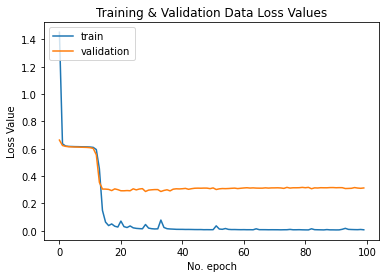

In [ ]:
# plot loss during training

plt.title('Training & Validation Data Loss Values')
plt.plot(results_ac_model_1.history['loss'], label='train')
plt.plot(results_ac_model_1.history['val_loss'], label='validation')
plt.ylabel('Loss Value')    
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

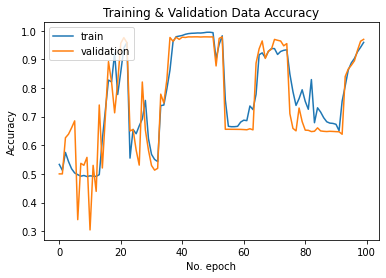

In [ ]:
# plot accuracy during training

plt.title('Training & Validation Data Accuracy')
plt.plot(results_ac_model_1.history['accuracy'], label='train')
plt.plot(results_ac_model_1.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# LSTM Workings_Autoencoder Model

ac_model_1b = Sequential()
ac_model_1b.add(Bidirectional(LSTM(units=200, return_sequences = True,
                               input_shape = (n_timesteps, n_features), 
                                kernel_initializer='glorot_normal')))
ac_model_1b.add(LSTM(100))
ac_model_1b.add(Dropout(0.2))

ac_model_1b.add(RepeatVector(n_timesteps))

ac_model_1b.add(LSTM(100, return_sequences = True))
ac_model_1b.add(Dropout(0.2))
ac_model_1b.add(LSTM(200, return_sequences = True))
ac_model_1b.add(TimeDistributed(Dense(2, activation='sigmoid')))

ac_model_1b.compile(loss='binary_crossentropy', optimizer='SGD', 
                 metrics=['accuracy', f1_m, precision_m, recall_m])

results_ac_model_1b = ac_model_1b.fit(x_train, y_train, epochs=100, batch_size=32,
                        shuffle=True, validation_data=(x_valid, y_valid))

print(ac_model_1b.summary())

Epoch 1/100
2732/2732 [==============================] - 31s 11ms/step - loss: 0.6420 - accuracy: 0.4635 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6349 - val_accuracy: 0.5646 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
2732/2732 [==============================] - 30s 11ms/step - loss: 0.6343 - accuracy: 0.5016 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6336 - val_accuracy: 0.5427 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
2732/2732 [==============================] - 30s 11ms/step - loss: 0.6327 - accuracy: 0.4910 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6318 - val_accuracy: 0.5292 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
2732/2732 [==============================] - 30s 11ms/step - loss: 0.6305 - accuracy: 0.4968 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6294 - val_accuracy: 0.4809 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
2732/273

In [ ]:
# Performance Metrcs

Train_Acc = np.mean(results_ac_model_1b.history["accuracy"]) * 100
Valid_Acc = np.mean(results_ac_model_1b.history["val_accuracy"]) * 100
Train_Precision = np.mean(results_ac_model_1b.history["precision"]) * 100
Valid_Precision = np.mean(results_ac_model_1b.history["val_precision"]) * 100
Train_Recall = np.mean(results_ac_model_1b.history["recall"]) * 100
Valid_Recall = np.mean(results_ac_model_1b.history["val_recall"]) * 100

print("Training-Accuracy:", Train_Acc, '%')
print("Validation-Accuracy:", Valid_Acc, '%') 
print("Training-Precision:", Train_Precision, '%')
print("Validation-Precision:", Valid_Precision, '%')
print("Training-Recall:", Train_Recall, '%')
print("Validation-Recall:", Valid_Recall, '%')

Train_F1_Score = 2 * ((Train_Precision*Train_Recall) / (Train_Precision+Train_Recall))
Valid_F1_Score = 2 * ((Valid_Precision*Valid_Recall) / (Valid_Precision+Valid_Recall))

print("Training-F1 Score:", Train_F1_Score)
print("Validation-F1 Score:", Valid_F1_Score)

Training-Accuracy: 47.06680741906166 %
Validation-Accuracy: 58.31828607618809 %
Training-Precision: 81.22716316580772 %
Validation-Precision: 25.072219118475914 %
Training-Recall: 66.84280504940762 %
Validation-Recall: 21.666463112458587 %
Training-F1 Score: 73.33629496451246
Validation-F1 Score: 23.245255738870497


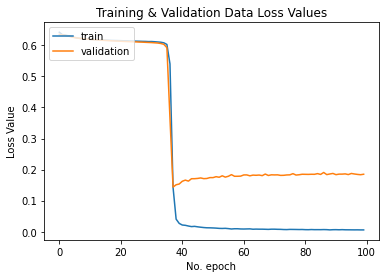

In [ ]:
# plot loss during training

plt.title('Training & Validation Data Loss Values')
plt.plot(results_ac_model_1b.history['loss'], label='train')
plt.plot(results_ac_model_1b.history['val_loss'], label='validation')
plt.ylabel('Loss Value')    
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

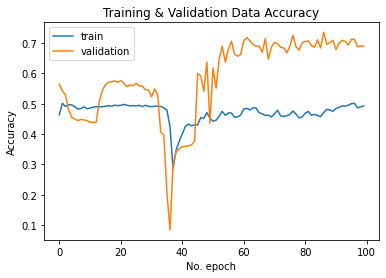

In [ ]:
# plot accuracy during training

plt.title('Training & Validation Data Accuracy')
plt.plot(results_ac_model_1b.history['accuracy'], label='train')
plt.plot(results_ac_model_1b.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# LSTM Workings_Autoencoder Model

ac_model_1c = Sequential()
ac_model_1c.add(Bidirectional(LSTM(units=200, return_sequences = True,
                               input_shape = (n_timesteps, n_features), 
                                kernel_initializer='glorot_normal')))
ac_model_1c.add(LSTM(100))
ac_model_1c.add(Dropout(0.2))

ac_model_1c.add(RepeatVector(n_timesteps))

ac_model_1c.add(LSTM(100, return_sequences = True))
ac_model_1c.add(Dropout(0.2))
ac_model_1c.add(LSTM(200, return_sequences = True))
ac_model_1c.add(TimeDistributed(Dense(2, activation='tanh')))

ac_model_1c.compile(loss='binary_crossentropy', optimizer='RMSprop', 
                 metrics=['accuracy', keras_metrics.precision(), keras_metrics.recall()])

results_ac_model_1c = ac_model_1c.fit(x_train, y_train, epochs=100, batch_size=32,
                        shuffle=True, validation_data=(x_valid, y_valid))

print(ac_model_1c.summary())

Epoch 1/100
2732/2732 [==============================] - 36s 13ms/step - loss: 0.0722 - accuracy: 0.5262 - precision: 21061494.0000 - recall: 0.7944 - val_loss: 0.2859 - val_accuracy: 0.9753 - val_precision: 0.3218 - val_recall: 0.3166
Epoch 2/100
2732/2732 [==============================] - 35s 13ms/step - loss: 0.0264 - accuracy: 0.6159 - precision: 1.0205 - recall: 0.9907 - val_loss: 0.2889 - val_accuracy: 0.3307 - val_precision: 0.3211 - val_recall: 0.3167
Epoch 3/100
2732/2732 [==============================] - 36s 13ms/step - loss: 0.0199 - accuracy: 0.5880 - precision: 1.1290 - recall: 0.9927 - val_loss: 0.2941 - val_accuracy: 0.0215 - val_precision: 0.3096 - val_recall: 0.3155
Epoch 4/100
2732/2732 [==============================] - 35s 13ms/step - loss: 0.0214 - accuracy: 0.4350 - precision: 1.7455 - recall: 0.9935 - val_loss: 0.3165 - val_accuracy: 0.8208 - val_precision: 0.3302 - val_recall: 0.3105
Epoch 5/100
2732/2732 [==============================] - 34s 12ms/step - loss

In [ ]:
# Performance Metrcs

Train_Acc = np.mean(results_ac_model_1c.history["accuracy"]) * 100
Valid_Acc = np.mean(results_ac_model_1c.history["val_accuracy"]) * 100
Train_Precision = np.mean(results_ac_model_1c.history["precision"]) * 100
Valid_Precision = np.mean(results_ac_model_1c.history["val_precision"]) * 100
Train_Recall = np.mean(results_ac_model_1c.history["recall"]) * 100
Valid_Recall = np.mean(results_ac_model_1c.history["val_recall"]) * 100

print("Training-Accuracy:", Train_Acc, '%')
print("Validation-Accuracy:", Valid_Acc, '%') 
print("Training-Precision:", Train_Precision, '%')
print("Validation-Precision:", Valid_Precision, '%')
print("Training-Recall:", Train_Recall, '%')
print("Validation-Recall:", Valid_Recall, '%')

Train_F1_Score = 2 * ((Train_Precision*Train_Recall) / (Train_Precision+Train_Recall))
Valid_F1_Score = 2 * ((Valid_Precision*Valid_Recall) / (Valid_Precision+Valid_Recall))

print("Training-F1 Score:", Train_F1_Score)
print("Validation-F1 Score:", Valid_F1_Score)

Training-Accuracy: 65.94707342982292 %
Validation-Accuracy: 67.06243569776416 %
Training-Precision: 474685141.73975915 %
Validation-Precision: -14.105491288006306 %
Training-Recall: 98.83742094039917 %
Validation-Recall: 29.752136796712875 %
Training-F1 Score: 197.67480072158403
Validation-F1 Score: -53.64325614101514


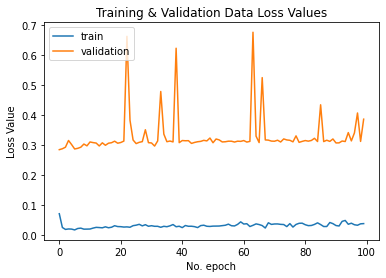

In [ ]:
# plot loss during training

plt.title('Training & Validation Data Loss Values')
plt.plot(results_ac_model_1c.history['loss'], label='train')
plt.plot(results_ac_model_1c.history['val_loss'], label='validation')
plt.ylabel('Loss Value')    
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

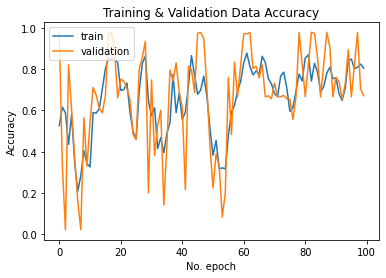

In [ ]:
# plot accuracy during training

plt.title('Training & Validation Data Accuracy')
plt.plot(results_ac_model_1c.history['accuracy'], label='train')
plt.plot(results_ac_model_1c.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# LSTM Workings_Autoencoder Model

ac_model_1d = Sequential()
ac_model_1d.add(Bidirectional(LSTM(units=200, return_sequences = True,
                               input_shape = (n_timesteps, n_features), 
                                kernel_initializer='glorot_normal')))
ac_model_1d.add(LSTM(100))
ac_model_1d.add(Dropout(0.2))

ac_model_1d.add(RepeatVector(n_timesteps))

ac_model_1d.add(LSTM(100, return_sequences = True))
ac_model_1d.add(Dropout(0.2))
ac_model_1d.add(LSTM(200, return_sequences = True))
ac_model_1d.add(TimeDistributed(Dense(2, activation='tanh')))

ac_model_1d.compile(loss='binary_crossentropy', optimizer='Adamax', 
                 metrics=['accuracy', keras_metrics.precision(), keras_metrics.recall()])

results_ac_model_1d = ac_model_1d.fit(x_train, y_train, epochs=100, batch_size=32,
                        shuffle=True, validation_data=(x_valid, y_valid))

print(ac_model_1d.summary())

Epoch 1/100
2732/2732 [==============================] - 33s 12ms/step - loss: 0.1533 - accuracy: 0.2619 - precision: 3.4856 - recall: 0.5005 - val_loss: 0.2963 - val_accuracy: 0.1707 - val_precision: -0.6709 - val_recall: 0.3089
Epoch 2/100
2732/2732 [==============================] - 31s 11ms/step - loss: 0.0123 - accuracy: 0.1781 - precision: 146414.0156 - recall: 0.9980 - val_loss: 0.3047 - val_accuracy: 0.2006 - val_precision: -0.9749 - val_recall: 0.3078
Epoch 3/100
2732/2732 [==============================] - 32s 12ms/step - loss: 0.0099 - accuracy: 0.1813 - precision: 2.9383 - recall: 0.9980 - val_loss: 0.3073 - val_accuracy: 0.1625 - val_precision: -0.5719 - val_recall: 0.3068
Epoch 4/100
2732/2732 [==============================] - 31s 11ms/step - loss: 0.0095 - accuracy: 0.2945 - precision: 2.5464 - recall: 0.9986 - val_loss: 0.3112 - val_accuracy: 0.5284 - val_precision: -0.7670 - val_recall: 0.3096
Epoch 5/100
2732/2732 [==============================] - 32s 12ms/step - lo

In [ ]:
# Performance Metrcs

Train_Acc = np.mean(results_ac_model_1d.history["accuracy"]) * 100
Valid_Acc = np.mean(results_ac_model_1d.history["val_accuracy"]) * 100
Train_Precision = np.mean(results_ac_model_1d.history["precision"]) * 100
Valid_Precision = np.mean(results_ac_model_1d.history["val_precision"]) * 100
Train_Recall = np.mean(results_ac_model_1d.history["recall"]) * 100
Valid_Recall = np.mean(results_ac_model_1d.history["val_recall"]) * 100

print("Training-Accuracy:", Train_Acc, '%')
print("Validation-Accuracy:", Valid_Acc, '%') 
print("Training-Precision:", Train_Precision, '%')
print("Validation-Precision:", Valid_Precision, '%')
print("Training-Recall:", Train_Recall, '%')
print("Validation-Recall:", Valid_Recall, '%')

Train_F1_Score = 2 * ((Train_Precision*Train_Recall) / (Train_Precision+Train_Recall))
Valid_F1_Score = 2 * ((Valid_Precision*Valid_Recall) / (Valid_Precision+Valid_Recall))

print("Training-F1 Score:", Train_F1_Score)
print("Validation-F1 Score:", Valid_F1_Score)

Training-Accuracy: 27.701171129941944 %
Validation-Accuracy: 24.381751306355 %
Training-Precision: 151482755.66744256 %
Validation-Precision: -4.109473159536719 %
Training-Recall: 99.37088978290558 %
Validation-Recall: 31.108290612697605 %
Training-F1 Score: 198.74164919364813
Validation-F1 Score: -9.469947010363018


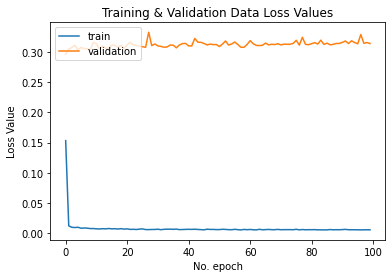

In [ ]:
# plot loss during training

plt.title('Training & Validation Data Loss Values')
plt.plot(results_ac_model_1d.history['loss'], label='train')
plt.plot(results_ac_model_1d.history['val_loss'], label='validation')
plt.ylabel('Loss Value')    
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

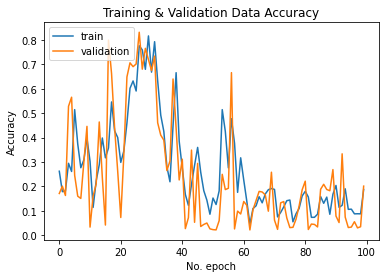

In [ ]:
# plot accuracy during training

plt.title('Training & Validation Data Accuracy')
plt.plot(results_ac_model_1d.history['accuracy'], label='train')
plt.plot(results_ac_model_1d.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# LSTM Workings_Autoencoder Model

ac_model_1e = Sequential()
ac_model_1e.add(Bidirectional(LSTM(units=250, return_sequences = True,
                               input_shape = (n_timesteps, n_features), 
                                kernel_initializer='glorot_normal')))
ac_model_1e.add(LSTM(125))
ac_model_1e.add(Dropout(0.2))

ac_model_1e.add(RepeatVector(n_timesteps))

ac_model_1e.add(LSTM(125, return_sequences = True))
ac_model_1e.add(Dropout(0.2))
ac_model_1e.add(LSTM(250, return_sequences = True))
ac_model_1e.add(TimeDistributed(Dense(2, activation='tanh')))

ac_model_1e.compile(loss='binary_crossentropy', optimizer='SGD', 
                 metrics=['accuracy', keras_metrics.precision(), keras_metrics.recall()])

results_ac_model_1e = ac_model_1e.fit(x_train, y_train, epochs=100, batch_size=32,
                        shuffle=True, validation_data=(x_valid, y_valid))

print(ac_model_1e.summary())

Epoch 1/100
2732/2732 [==============================] - 32s 12ms/step - loss: 0.1555 - accuracy: 0.8413 - precision: 3.6490 - recall: 0.5034 - val_loss: 0.3052 - val_accuracy: 0.9581 - val_precision: -0.6508 - val_recall: 0.3076
Epoch 2/100
2732/2732 [==============================] - 31s 11ms/step - loss: 0.0121 - accuracy: 0.7822 - precision: 554326592.0000 - recall: 0.9985 - val_loss: 0.3025 - val_accuracy: 0.8617 - val_precision: -0.5689 - val_recall: 0.3077
Epoch 3/100
2732/2732 [==============================] - 32s 12ms/step - loss: 0.0110 - accuracy: 0.6098 - precision: 144630240.0000 - recall: 0.9980 - val_loss: 0.3278 - val_accuracy: 0.5442 - val_precision: -0.5569 - val_recall: 0.3037
Epoch 4/100
2732/2732 [==============================] - 32s 12ms/step - loss: 0.0091 - accuracy: 0.2888 - precision: 211958464.0000 - recall: 0.9986 - val_loss: 0.3073 - val_accuracy: 0.2941 - val_precision: -0.4723 - val_recall: 0.3055
Epoch 5/100
2732/2732 [==============================] -

In [ ]:
# Performance Metrcs

Train_Acc = np.mean(results_ac_model_1e.history["accuracy"]) * 100
Valid_Acc = np.mean(results_ac_model_1e.history["val_accuracy"]) * 100
Train_Precision = np.mean(results_ac_model_1e.history["precision"]) * 100
Valid_Precision = np.mean(results_ac_model_1e.history["val_precision"]) * 100
Train_Recall = np.mean(results_ac_model_1e.history["recall"]) * 100
Valid_Recall = np.mean(results_ac_model_1e.history["val_recall"]) * 100

print("Training-Accuracy:", Train_Acc, '%')
print("Validation-Accuracy:", Valid_Acc, '%') 
print("Training-Precision:", Train_Precision, '%')
print("Validation-Precision:", Valid_Precision, '%')
print("Training-Recall:", Train_Recall, '%')
print("Validation-Recall:", Valid_Recall, '%')

Train_F1_Score = 2 * ((Train_Precision*Train_Recall) / (Train_Precision+Train_Recall))
Valid_F1_Score = 2 * ((Valid_Precision*Valid_Recall) / (Valid_Precision+Valid_Recall))

print("Training-F1 Score:", Train_F1_Score)
print("Validation-F1 Score:", Valid_F1_Score)

Training-Accuracy: 30.286560732871294 %
Validation-Accuracy: 27.040868857875466 %
Training-Precision: 6909377922.827514 %
Validation-Precision: 5532374.3261408955 %
Training-Recall: 99.36675184965134 %
Validation-Recall: 30.956468760967255 %
Training-F1 Score: 198.73350084123024
Validation-F1 Score: 61.912591089267636


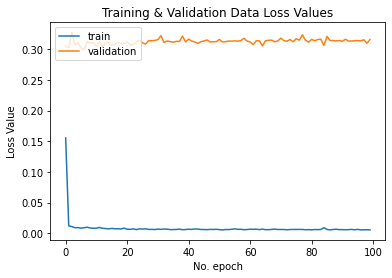

In [ ]:
# plot loss during training

plt.title('Training & Validation Data Loss Values')
plt.plot(results_ac_model_1e.history['loss'], label='train')
plt.plot(results_ac_model_1e.history['val_loss'], label='validation')
plt.ylabel('Loss Value')    
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

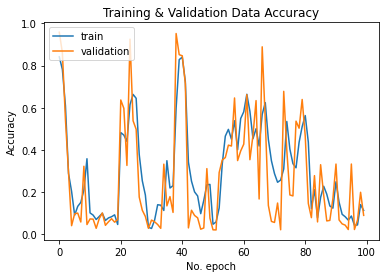

In [ ]:
# plot accuracy during training

plt.title('Training & Validation Data Accuracy')
plt.plot(results_ac_model_1e.history['accuracy'], label='train')
plt.plot(results_ac_model_1e.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# LSTM Workings_Autoencoder Model

ac_model_1f = Sequential()
ac_model_1f.add(Bidirectional(LSTM(units=500, return_sequences = True,
                               input_shape = (n_timesteps, n_features), 
                                kernel_initializer='glorot_normal')))
ac_model_1f.add(LSTM(250))
ac_model_1f.add(Dropout(0.2))

ac_model_1f.add(RepeatVector(n_timesteps))

ac_model_1f.add(LSTM(250, return_sequences = True))
ac_model_1f.add(Dropout(0.2))
ac_model_1f.add(LSTM(500, return_sequences = True))
ac_model_1f.add(TimeDistributed(Dense(2, activation='tanh')))

ac_model_1f.compile(loss='binary_crossentropy', optimizer='SGD', 
                 metrics=['accuracy', keras_metrics.precision(), keras_metrics.recall()])

results_ac_model_1f = ac_model_1f.fit(x_train, y_train, epochs=100, batch_size=32,
                        shuffle=True, validation_data=(x_valid, y_valid))

print(ac_model_1f.summary())

Epoch 1/100
2732/2732 [==============================] - 33s 12ms/step - loss: 0.6312 - accuracy: 0.5176 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6247 - val_accuracy: 0.5048 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
2732/2732 [==============================] - 31s 11ms/step - loss: 0.6217 - accuracy: 0.5325 - precision: 0.5184 - recall: 0.0014 - val_loss: 0.6209 - val_accuracy: 0.5175 - val_precision: 0.2110 - val_recall: 0.0147
Epoch 3/100
2732/2732 [==============================] - 31s 11ms/step - loss: 0.6193 - accuracy: 0.5281 - precision: 0.6835 - recall: 0.0720 - val_loss: 0.6185 - val_accuracy: 0.5934 - val_precision: 0.1585 - val_recall: 0.0388
Epoch 4/100
2732/2732 [==============================] - 31s 11ms/step - loss: 0.6177 - accuracy: 0.5238 - precision: 0.6128 - recall: 0.1036 - val_loss: 0.6165 - val_accuracy: 0.5188 - val_precision: 0.1388 - val_recall: 0.0420
Epoch 5/100
2732/2732 [==============================] - 31s 11ms/st

In [ ]:
# Performance Metrcs

Train_Acc = np.mean(results_ac_model_1f.history["accuracy"]) * 100
Valid_Acc = np.mean(results_ac_model_1f.history["val_accuracy"]) * 100
Train_Precision = np.mean(results_ac_model_1f.history["precision"]) * 100
Valid_Precision = np.mean(results_ac_model_1f.history["val_precision"]) * 100
Train_Recall = np.mean(results_ac_model_1f.history["recall"]) * 100
Valid_Recall = np.mean(results_ac_model_1f.history["val_recall"]) * 100

print("Training-Accuracy:", Train_Acc, '%')
print("Validation-Accuracy:", Valid_Acc, '%') 
print("Training-Precision:", Train_Precision, '%')
print("Validation-Precision:", Valid_Precision, '%')
print("Training-Recall:", Train_Recall, '%')
print("Validation-Recall:", Valid_Recall, '%')

Train_F1_Score = 2 * ((Train_Precision*Train_Recall) / (Train_Precision+Train_Recall))
Valid_F1_Score = 2 * ((Valid_Precision*Valid_Recall) / (Valid_Precision+Valid_Recall))

print("Training-F1 Score:", Train_F1_Score)
print("Validation-F1 Score:", Valid_F1_Score)

Training-Accuracy: 61.42233729362487 %
Validation-Accuracy: 63.596544578671455 %
Training-Precision: 117072.33242130281 %
Validation-Precision: -5.0126674100756645 %
Training-Recall: 78.3349299589172 %
Validation-Recall: 23.977585097774863 %
Training-F1 Score: 156.56509975913602
Validation-F1 Score: -12.675157506208347


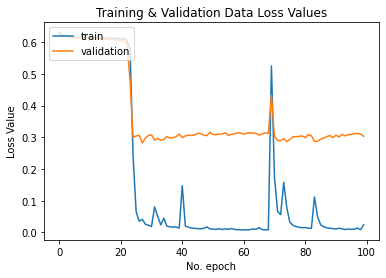

In [ ]:
# plot loss during training

plt.title('Training & Validation Data Loss Values')
plt.plot(results_ac_model_1f.history['loss'], label='train')
plt.plot(results_ac_model_1f.history['val_loss'], label='validation')
plt.ylabel('Loss Value')    
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

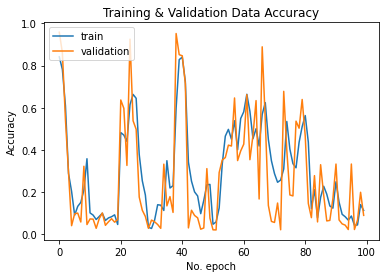

In [ ]:
# plot accuracy during training

plt.title('Training & Validation Data Accuracy')
plt.plot(results_ac_model_1e.history['accuracy'], label='train')
plt.plot(results_ac_model_1e.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()